# New Synthetic Data Method 3
## Synthetic Data Generation - SDV python library

### Introduction

In this notebook we will introduce you to SDV python library for generating synthetic dataset. Private Technology for Financial Intelligence need synthetic data to be able to implement the private technologies such as differential privacy and others. We need to be able to obtain financial data but due to privacy concerns and regulation these type of dataset are unavailable. A solution to this problem is to generate synthetic dataset which resemble financial data. The SDV python library is very good at generating synthetic but it also tries to replicate statistical properties of real world dataset.

**What are the options to generating synthetic datasets**
 - For example: Generating synthetic data according to distribution. This means we need to have a idea of the underlying distribution of the real dataset. (normal, exponential, chi-square, etc.) From there we can generate a synthetic dataset that resembles the distribution of a real dataset.

**[Explain  Generative Models: The power of GANs and VAEs]**

What about timeseries data TVAE (RESEARCH this most financial dataset are timeseries!)

**[Use IBM AML synthetic as the real data which we are going to create a synthetic dataset. We are assuming that IBM a big company will create a dataset with the distribution and statistical properties of real datasets}

**References:**






*   https://github.com/sdv-dev/SDV
*   https://sdv.dev/SDV/
*  https://github.com/sdv-dev/CTGAN
*   https://colab.research.google.com/drive/1F3WWduNjcX4oKck6XkjlwZ9zIsWlTGEM?usp=sharing#scrollTo=ZwdD7psYFOYL
* https://github.com/sdv-dev/CTGAN
* https://www.kaggle.com/datasets/vysakhvms/dataset/data





### Install the SDV library

In [ ]:
# Install the ctgan library
!pip install ctgan

In [ ]:
# Install the table_evaluator library for evaluate the quality of synthetic dataset
!pip install table_evaluator

In [ ]:
# Will test it on this dataset as well. IBM as real dataset
import pandas as pd
data = pd.read_csv('/content/IBM.csv')

# Print the first few rows of the DataFrame
print(data.head())

In [5]:
# We upload the real dataset
import pandas as pd
data = pd.read_csv('/content/Insurance.csv')

# Print the first few rows of the DataFrame
print(data.head(10))

   Age  Policy Term  PPT  Amount    Plan
0   33           20   10   30000  Nonpar
1   27           20   10   25000  Nonpar
2   36           20   10   30000  Nonpar
3   36           20   20    2000  Health
4   43           20    5   25000  Nonpar
5   40           20   10   30000  Nonpar
6   25           12    6   30000  Nonpar
7   26           20   20    1500  Health
8   26           20   10  100000  Nonpar
9   46           20   10   30000  Nonpar


In [6]:
# Check the data type 
data.dtypes

Age             int64
Policy Term     int64
PPT             int64
Amount          int64
Plan           object
dtype: object

In [7]:
# This will tell model that Plan is a categorical variable
categorical_features = ['Plan']

In [8]:
# import CTGAN library
from ctgan import CTGAN

# Train the model
ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 200)

Gen. (-0.55) | Discrim. (-0.06): 100%|██████████| 200/200 [00:14<00:00, 13.64it/s]


#Synthetic data

In [9]:
# Create synthetic data from the trained model
samples = ctgan.sample(1000)

# Show 5 rows
samples.head()

,Age,Policy Term,PPT,Amount,Plan
0,38,14,11,105567,Health
1,70,15,11,87149,Nonpar
2,32,19,8,91269,Par
3,35,14,10,32657,Par
4,38,14,7,97667,ULIP


#Evaluation

[Explain the importance of evaluation] - For example what are we look for in the data.

(100, 5) (1000, 5)


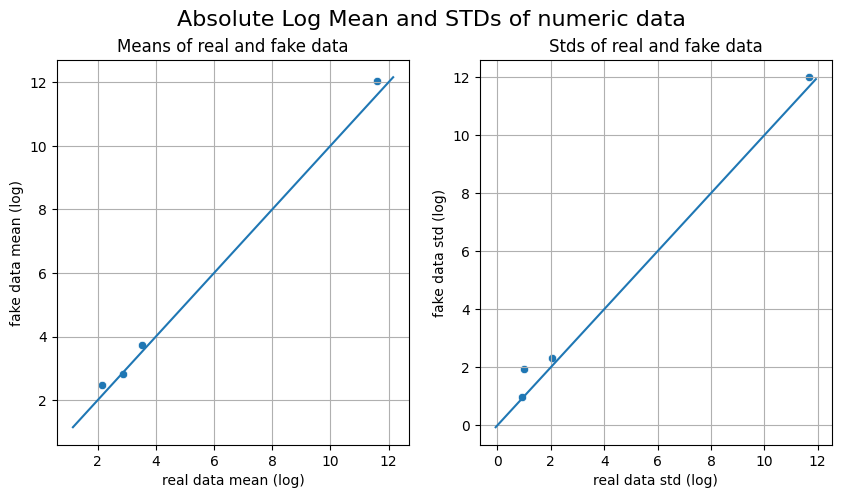

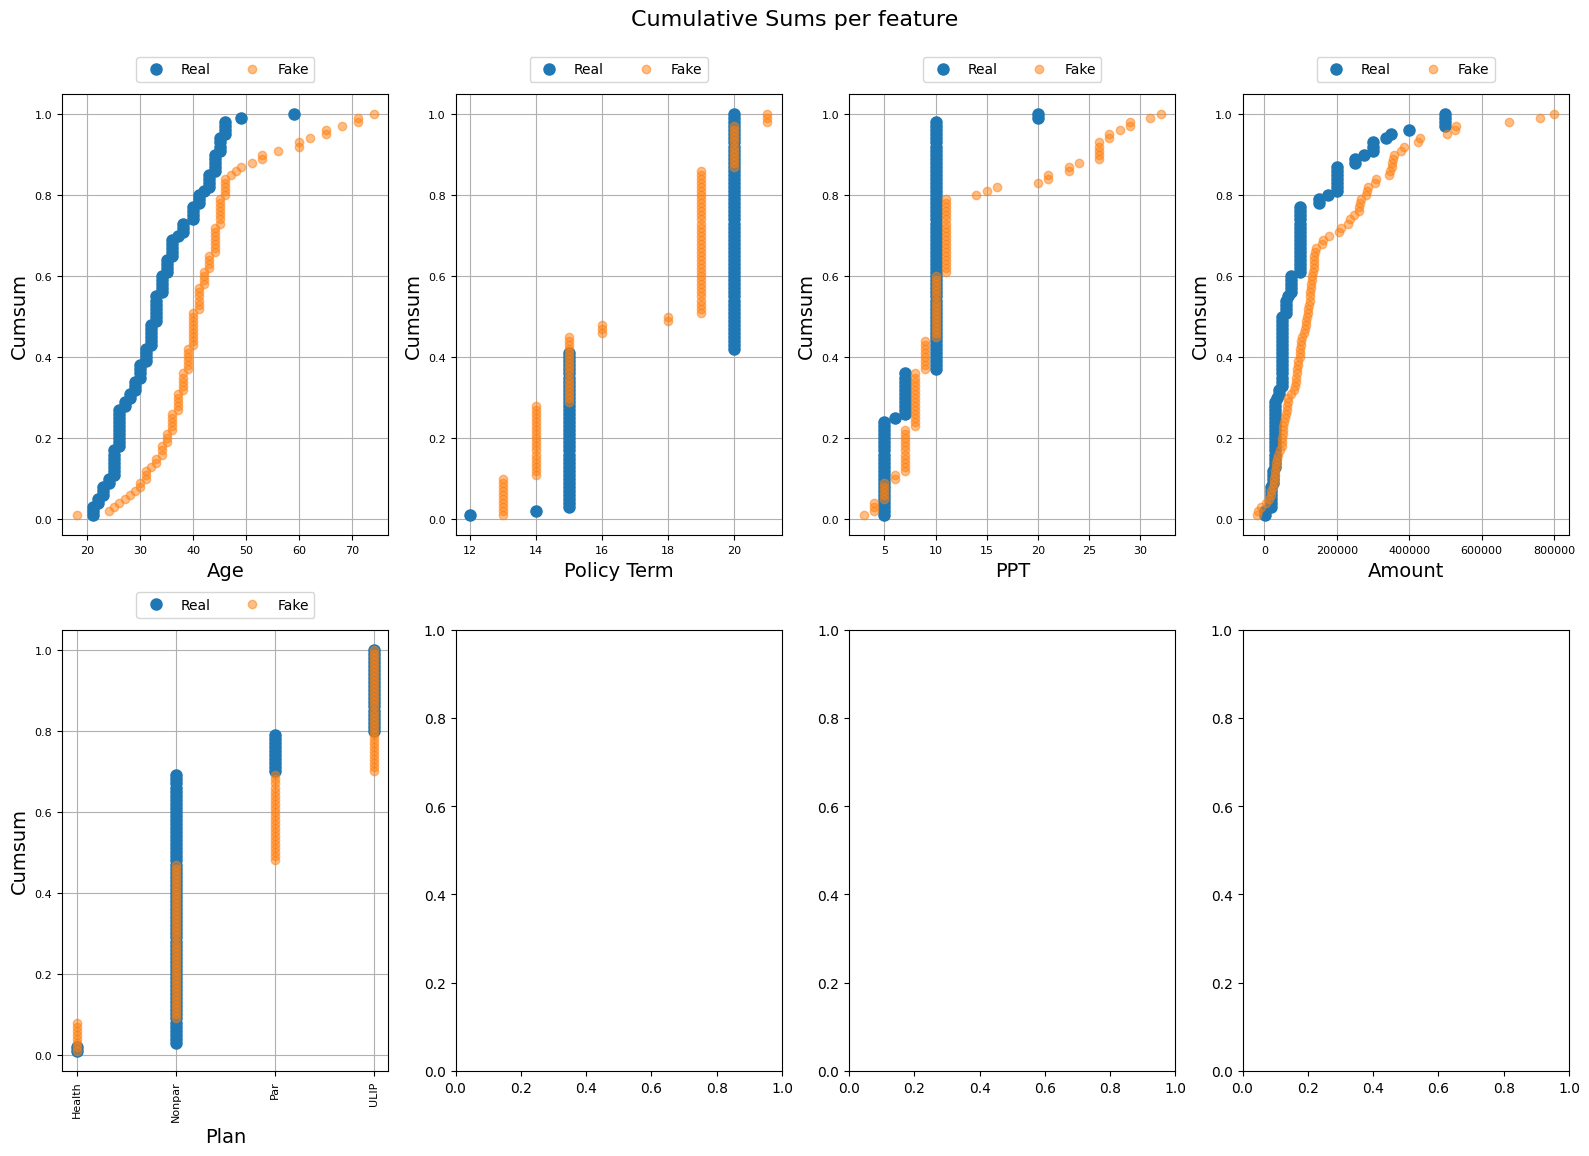

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


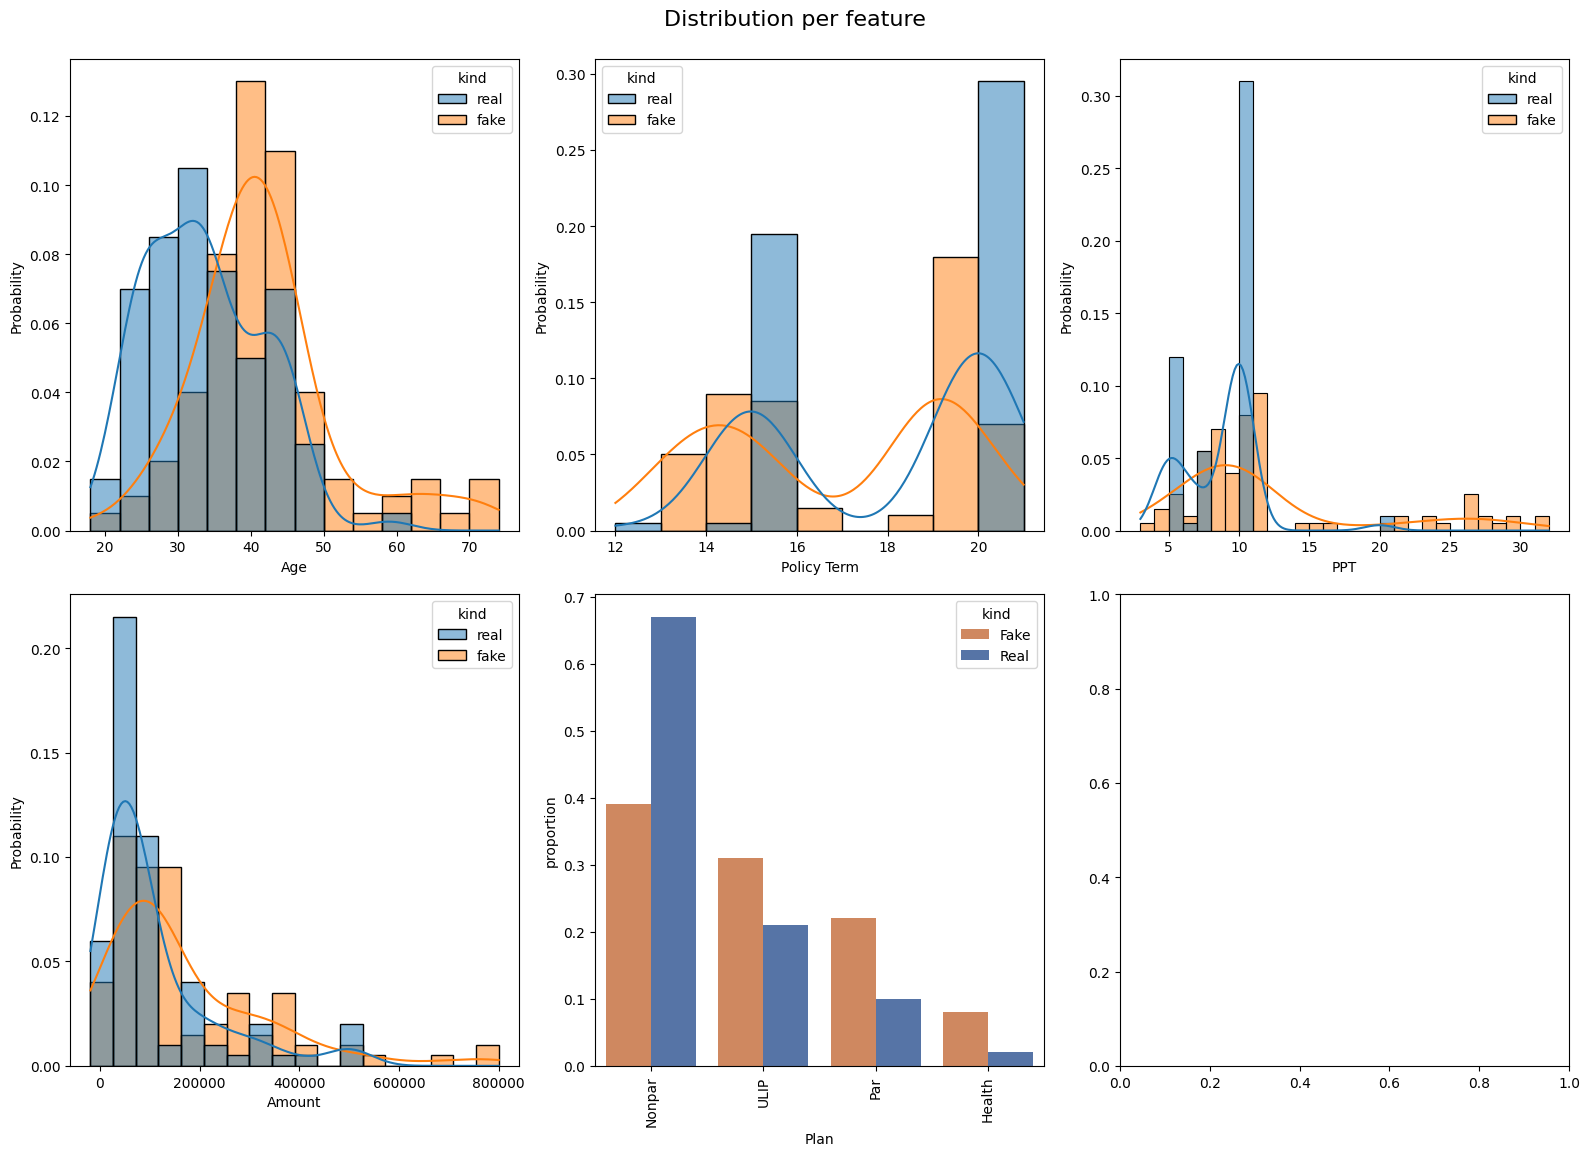

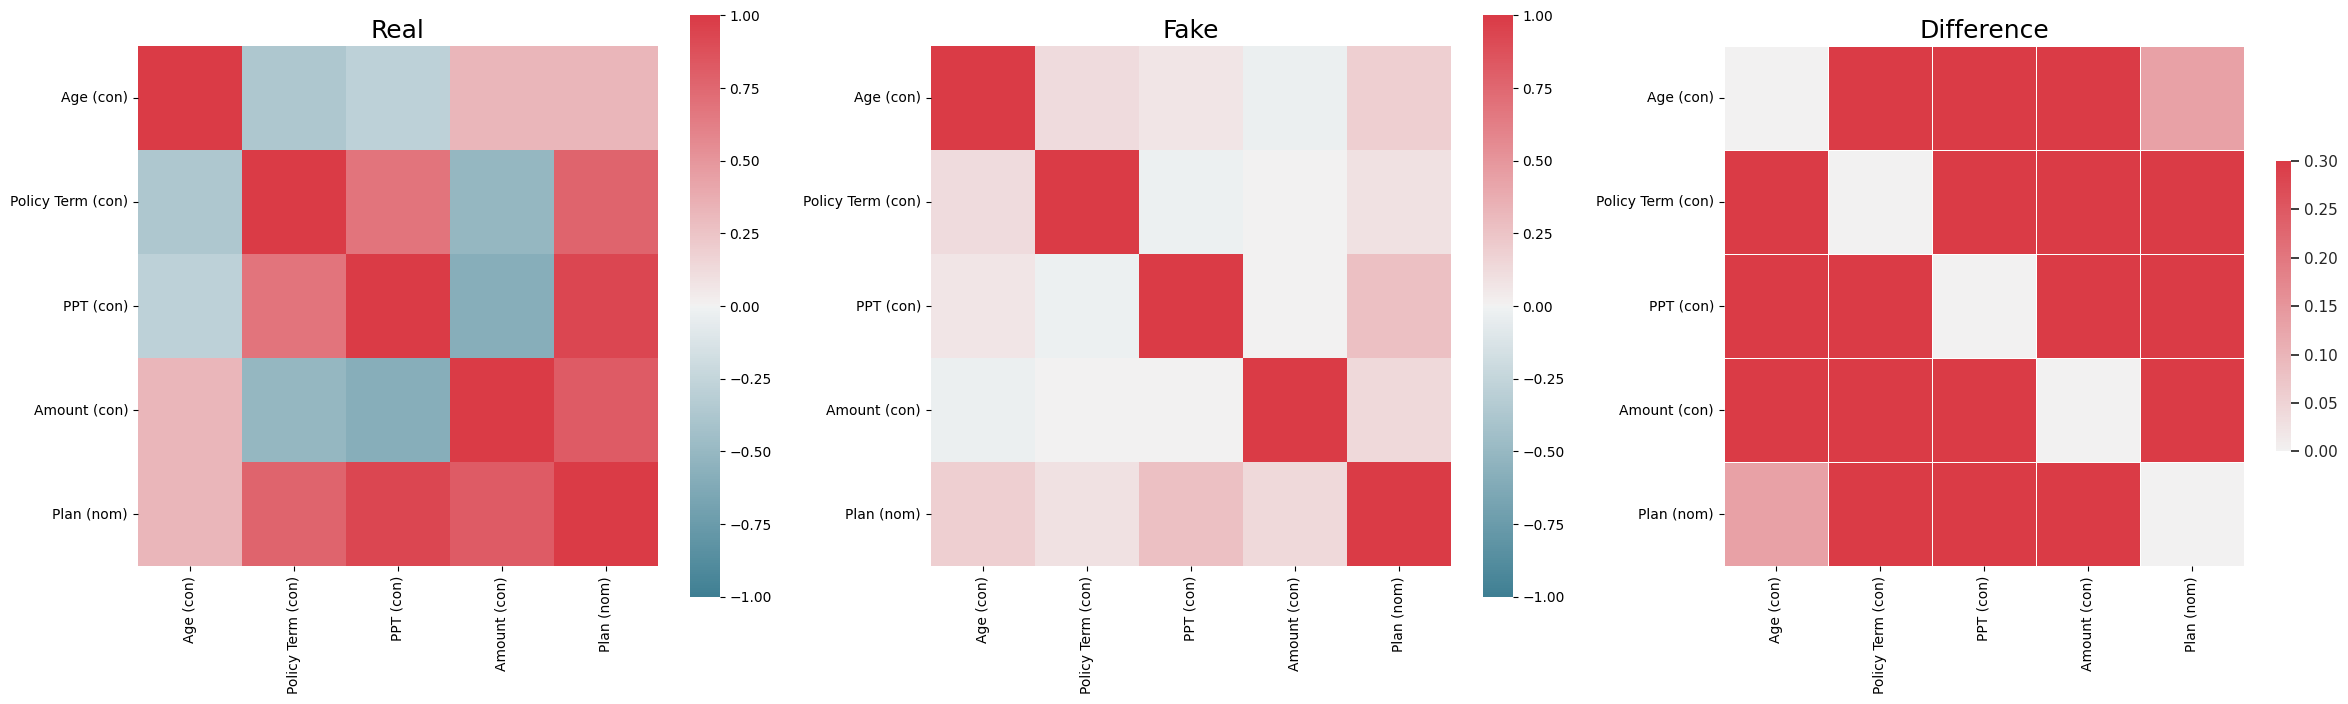

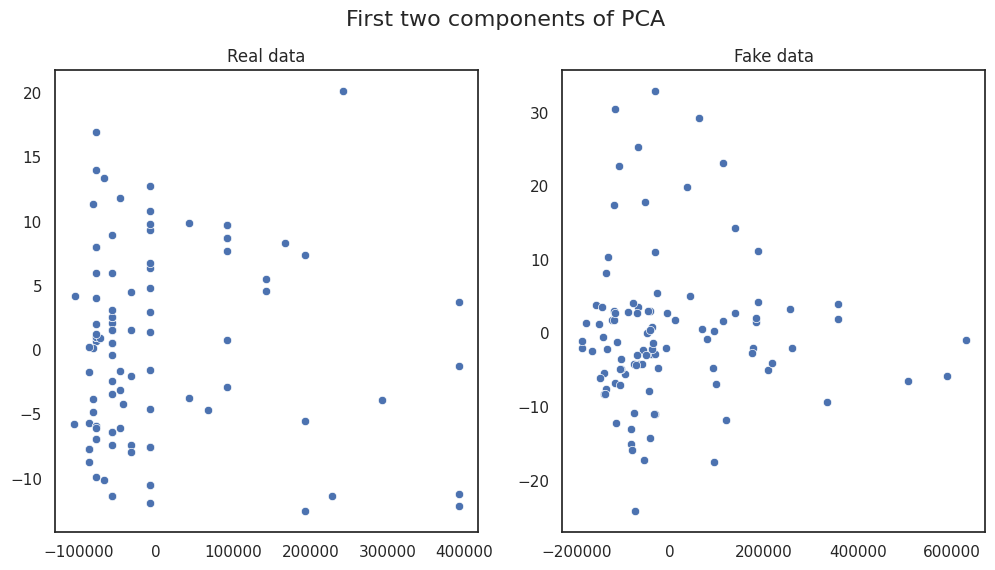

In [12]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()